# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
</pre>

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [4]:
# #i am living in the New York
# print("i am living in the New York -->", list(chunks))
# print(" ")
# print("-"*50)
# print(" ")
# #My name is Srikanth Varma
# print("My name is Srikanth Varma -->", list(chunks1))

<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

# Functions for Preprocessing (Mail, Subject, Text)

Task at hand:
1. function for obtaining preprocessed mails 
2. function for obtaining preprocessed subjects 
3. function for obtaining preprocessed text

In [5]:
import pandas as pd 
import numpy as np
from itertools import chain
import contractions
import re

In [2]:
# https://thispointer.com/python-remove-characters-from-string-by-regex-4-other-ways/

### Mail Preprocessing 

In [11]:
#this function removes the first half of the mail id. e.g. joebiden@nyc.us.com -> nyc.us.com -> [nyc, us, com]
#and removes any numbers
def mail_preprocessing(mail):
    tmp = re.sub('.*@', '', mail)
    tmp = re.sub('[^a-zA-Z\.]', '',tmp)
    return tmp.split(sep='.')

#this function takes one text at a time and returns the preprocessed and original mailids from that
def preprocess_mail(text):
    mails = re.findall('\w\S+@\S+\w', text) #returns a list of all mail ids from text
    
    mails_cpy = mails.copy() #we use this copy to perform operations and return the final string of words found in all mail ids
    mails_cpy = list(map(mail_preprocessing, mails_cpy)) #returns a list of lists
   
    #to flatten the list refer - https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
    mails_cpy = list(chain.from_iterable(mails_cpy)) 
    
    mails_cpy_2 = mails_cpy.copy() #never remove elements and iterate over a list at the same time(causes index jump)
    for word in mails_cpy_2:
        if word=='com' or len(word)<=2:
            mails_cpy.remove(word)
    final = ' '.join(mails_cpy)
    return final, mails 

In [12]:
#code check
with open('documents/alt.atheism_51060.txt', 'r') as f:
    text = f.read()
print(preprocess_mail(text))

('mantis mantis mantis', ['mathew@mantis.co.uk', 'mathew@mantis.co.uk', 'pgpinfo@mantis.co.uk'])


### Subject Preprocessing 

In [5]:
def subject_preprocessing(sub):
    #removing anything which appears in format similar to this 'Sub:' or 'Subject:' or 'FAQ:'
    tmp = re.sub('\w*:', '', sub)
    
    #removing if there is any stuff in brackets in our text like '[abc cyxs]' or '(abc xyz)' or '{abc sds}' or '<abs sd>'
    #note: use \ to escape characters
    tmp = re.sub('\[.*\]', ' ', tmp)
    tmp = re.sub('\(.*\)', ' ', tmp)
    tmp = re.sub('\{.*\}', ' ', tmp)
    tmp = re.sub('\<.*\>', ' ', tmp)
    
    #removing any special characters or numbers from our text
    tmp = re.sub('[^a-zA-Z ]', ' ',tmp) #note: we have retained spaces and alphabets here
    
    return ' '.join(tmp.split()) #tmp.strip()

def preprocess_subject(text): 
    subjects = re.findall('Subject:.+',text) #selects the subject line
    subjects_cpy = subjects.copy() 
    final = list(map(subject_preprocessing, subjects_cpy))
    final = ' '.join(final) #if more than 1 subject is present in the mail then join them
    return final, subjects

In [6]:
#code check
print(preprocess_subject(text))

('Alt Atheism Introduction to Atheism', ['Subject: Alt.Atheism FAQ: Introduction to Atheism'])


### Text Preprocessing

In [2]:
from nltk import word_tokenize, pos_tag, ne_chunk
import nltk 

In [3]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

In [9]:
def remove_underscore(text): 
    #for underscore at end of word : word_
    words_ = re.findall('\s[a-zA-Z]+_\Z', text) + re.findall('\s[a-zA-Z]+_\s', text) + re.findall('\A[a-zA-Z]+_\s', text) #merging all lists of pattern instances
    #for underscore at start of word : _word
    _words = re.findall('\s_[a-zA-Z]+\s', text) + re.findall('\s_[a-zA-Z]+\Z', text) + re.findall('\A_[a-zA-Z]+\s', text)
    #for underscore at start and end of word : _word_
    _words_ = re.findall('\s_[a-zA-Z]+_\s', text) + re.findall('\s_[a-zA-Z]+_\Z', text) + re.findall('\A_[a-zA-Z]+_\s', text)
    
    all_instances = words_ + _words_ + _words #merging the lists of all types of pattern instances
    all_instances = list(map(lambda x: x.strip() ,all_instances))
    stripped_words = []
    
    for instance in all_instances:
        stripped_words.append(re.sub('[^a-zA-Z]', '', instance))
    
    for pair in list(zip(all_instances, stripped_words)):
        text = text.replace(pair[0], pair[1])
    
    return text

def get_chunk(text): 
    words = word_tokenize(text)
    tagged = pos_tag(words) #parts of speech tagging of each word
    return list(ne_chunk(tagged)) #named entities are grouped under a tree structure

def preprocess(text):
    tmp = text
    p_mails, og_mails = preprocess_mail(tmp)
    p_subs, og_subs = preprocess_subject(tmp)
    
    #replace all mails by space in original text
    for mail in og_mails:
        tmp = tmp.replace(mail, ' ')
    
    #replace the subject line by space in original text
    for subj in og_subs:
        tmp = tmp.replace(subj, ' ')
    
    #delete all sentences which start from 'write to:' or 'from:'
    tmp = re.sub('(Write to:|From:).*', ' ', tmp) # can use (W|w) (F|f)
    #delete all tags
    tmp = re.sub('<.*>', ' ', tmp)
    #delete data in brackets
    tmp = re.sub('\(.*\)', ' ', tmp)
    #delete \n \t _ \
    tmp = re.sub('[-\n\t]', ' ', tmp)
    #delete all words attached to ':'
    tmp = re.sub('\w+:', ' ', tmp)
     
    #decontractions refer - # https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/
    decontracted = []
    for word in tmp.split():
        decontracted.append(contractions.fix(word))
    tmp = " ".join(decontracted)
    
# The main aim of chunking operation is to identify person names and location names in the text and then remove person names
# and replace 2 or more word long location names with same names only attached by a '_' 
    #chunking
    chunks = get_chunk(tmp)
    person = []
    place = []
    #removing the groups that are under the label 'PERSON'
    for item in chunks: 
        if hasattr(item,'label'): #only named items in chunks will have a tree structure and a label
            if item.label() == 'PERSON':
                if type(item) is nltk.Tree:
                    t = ' '.join(c[0] for c in item.leaves()) #item.leaves() gives the tagged words [(word, pos_tag)..(word_n, pos_tag)] in that specific tree (an n words long name of a person) 
                    person.append(t) #appends person name to list
            if item.label() == 'GPE':
                if type(item) is nltk.Tree: 
                    u = '_'.join(d[0] for d in item.leaves())
                    place.append(u)
    for p in person: 
        tmp = tmp.replace(p, ' ')
    
    for pl in place:
        pl_tmp = pl.split('_') #we split the place here to get new_york ---> ['new', 'york']
        pl_tmp = ' '.join(pl_tmp) #we join the place to get ['new', 'york'] ---> 'new york' to get the term which is originally in text
        tmp = tmp.replace(pl_tmp, pl) #we find and replace 'new york' ---> 'new_york'
        
    
    #remove all digits from the text
    tmp = re.sub('\d+', ' ', tmp)
    
    #remove '_' from words which start or end with '_'
    #note the char '_' will be next to a whitespace 
    tmp = remove_underscore(tmp)
    
    #remove oneletter_ or twoletter_
    instances = re.findall('\s[a-zA-z]{1,2}_[a-zA-z]+', tmp)
    instances = list(map(lambda x: x.strip(), instances))
    for i in instances:
        tmp = tmp.replace(i, (i.split(sep='_')[1]))
    
    #replace all the words except "A-Za-z_" with space. (doing this operation first so that only words are left in the text and no special characters or numbers)
    tmp = re.sub('[^a-zA-Z_]', ' ', tmp)
    
    #lowercase all words and remove len(word)>=15 and len(word)<=2
    tmp = tmp.lower()
    tmp_list = tmp.split()
    tmp_list_cpy = tmp_list.copy() #do not ever remove items and iterate over the list simultaneaously(causes the iterator to skip indexes)
    for word in tmp_list_cpy:
        if len(word)<=2 or len(word)>=15: 
            tmp_list.remove(word)
    p_text = ' '.join(tmp_list)
    
    return p_text, p_mails, p_subs

In [13]:
#code check
t, m, s = preprocess(text)
print(t[:100])
print(m)
print(s)

archive atheism introduction alt atheism archive introduction last april egin pgp signed message int
mantis mantis mantis
Alt Atheism Introduction to Atheism


# Preprocessing all the documents

In [14]:
# https://stackoverflow.com/questions/59180210/how-to-open-and-read-text-files-in-a-folder-python
import os
from tqdm import tqdm

path = 'C:\\Users\\Chirag\\Desktop\\Python\\Applied AI Assignments\\21. Text Classification with CNN\\CNN_with_textdata\\documents\\'

files = os.listdir(path)

# https://pythonguides.com/python-numpy-empty-array/#:~:text=To%20create%20an%20empty%20array%20of%20strings%20we%20can%20easily,empty()%20function.
# https://stackoverflow.com/questions/13717554/weird-behaviour-initializing-a-numpy-array-of-string-data
classes = np.empty((len(files),), dtype='object')
preprocessed_text = np.empty((len(files),),dtype = 'object')
preprocessed_mails = np.empty((len(files),),dtype = 'object')
preprocessed_subjects = np.empty((len(files),),dtype = 'object')

for i in tqdm(range(len(files))):
    text_class = re.sub(r'_.+', '', files[i]) #to get the class of document 
    classes[i] =  text_class
    with open(path+files[i], 'r') as f:
        text = f.read()
        p_text, p_mail, p_subject = preprocess(text)
        preprocessed_text[i] =  p_text
        preprocessed_mails[i] = p_mail
        preprocessed_subjects[i] = p_subject

100%|████████████████████████████████████████████████████████████████████████████| 18828/18828 [27:26<00:00, 11.43it/s]


In [15]:
#save the results
np.save('saved/preprocessed_text',preprocessed_text)
np.save('saved/preprocessed_mails',preprocessed_mails)
np.save('saved/preprocessed_subjects',preprocessed_subjects)
np.save('saved/classes', classes)

In [51]:
preprocessed_text = np.load('saved/preprocessed_text.npy', allow_pickle=True)
preprocessed_mails = np.load('saved/preprocessed_mails.npy',allow_pickle=True)
preprocessed_subjects = np.load('saved/preprocessed_subjects.npy',allow_pickle=True)
classes = np.load('saved/classes.npy',allow_pickle=True)

In [5]:
#checking size
print(len(preprocessed_text), len(preprocessed_mails), len(preprocessed_subjects), len(classes))

18828 18828 18828 18828


In [6]:
#check results
print('Text:', preprocessed_text[2], '\nMail:',preprocessed_mails[2], '\nSubject:', preprocessed_subjects[2], '\nClass:',classes[2])

Text: article well has quite different not necessarily more elaborated theology there some evidence that must have known and that the content was known him but not canonized form this new argument could you elaborate little the argument goes oid quotes appear but not the almost codified way they were however they are considered similar enough point knowledge such and not entirely different source assuming that knew would obviously put him after and would give evidence for the latter assumption not think this follows you take the most traditional attributions then might have known but elder figure either case are talking spans time here which are well within the range lifetimes are talking date texts here not the age the authors the usual explanation for the time order and does not consider their respective ages says has read the text and that assumed that knew the content text the evidence for that not overwhelming admittedly earlier manuscripts have been discovered interesting where a

# Analyzing Class Distribution and Assigning Weights

In [52]:
#refer - https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(classes),
                                                 y = classes)
class_weights #move this to train data part 

array([1.17822278, 0.96752312, 0.95573604, 0.9586558 , 0.97960458,
       0.96061224, 0.96851852, 0.95090909, 0.94708249, 0.94708249,
       0.94234234, 0.94994955, 0.95963303, 0.95090909, 0.95379939,
       0.9442327 , 1.03450549, 1.00148936, 1.21470968, 1.49904459])

In [53]:
#to feed to the model
class_w_dict = dict(zip(range(0,20), class_weights))

In [10]:
unique_classes = pd.DataFrame({'classes': np.unique(classes, return_counts=True)[0], 
                               'counts': np.unique(classes, return_counts=True)[1],
                              'percentage': list(map(lambda x: x/len(classes), np.unique(classes, return_counts=True)[1])), 
                              'weights': class_weights})
unique_classes

,classes,counts,percentage,weights
0,alt.atheism,799,0.042437,1.178223
1,comp.graphics,973,0.051678,0.967523
2,comp.os.ms-windows.misc,985,0.052316,0.955736
3,comp.sys.ibm.pc.hardware,982,0.052156,0.958656
4,comp.sys.mac.hardware,961,0.051041,0.979605
5,comp.windows.x,980,0.052050,0.960612
6,misc.forsale,972,0.051625,0.968519
7,rec.autos,990,0.052581,0.950909
8,rec.motorcycles,994,0.052794,0.947082
9,rec.sport.baseball,994,0.052794,0.947082


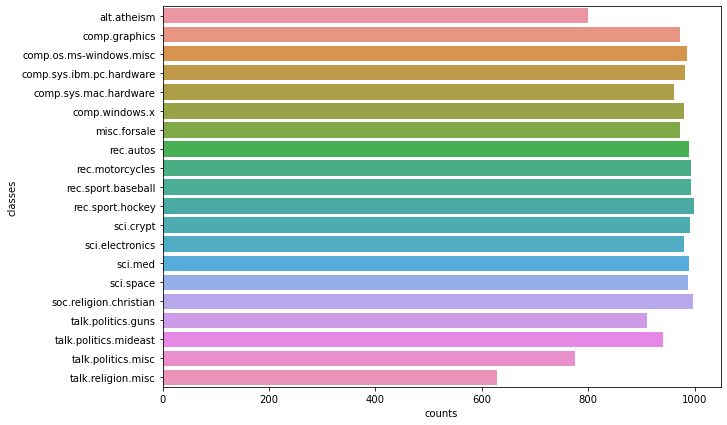

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.barplot(data = unique_classes, x = 'counts', y = 'classes')
plt.show()

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

# Stratified Splitting 

In [12]:
X = (preprocessed_text+' '+preprocessed_subjects+' '+preprocessed_mails)
X = np.array(list(map(lambda x: x.lower(), X)))
print(X.shape)

(18828,)


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(classes)
print(y.shape)

(18828,)


In [14]:
#checking
classes[795:805], y[795:805]

(array(['alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism',
        'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics',
        'comp.graphics', 'comp.graphics'], dtype=object),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

In [15]:
#checking classes obtained from label encoder's fit against our original classes
print('Classes:', le.classes_)
print(le.classes_ == unique_classes['classes'])

Classes: ['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: classes, dtype: bool


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=15)

In [22]:
#checking results and shape
print(X_train[0][:50], y_train[0], X_train.shape, y_train.shape)
print(X_test[0][:50], y_test[0], X_test.shape, y_test.shape)

article article fri apr can god uncreate itself fo 0 (14121,) (14121,)
article stupid question but what will cview run an 1 (4707,) (4707,)


In [28]:
# Converts a class vector (integers) to binary class matrix. [0,1,2] -> [[1,0,0], [0,1,0], [0,0,1]]
from tensorflow.keras.utils import to_categorical
y_train_tocat = to_categorical(y_train, num_classes=20)
y_test_tocat = to_categorical(y_test, num_classes=20)

In [33]:
#check results
print(y_train_tocat[:3], y_train[:3], y_train_tocat.shape)
print(y_test_tocat[:3], y_test[:3], y_test_tocat.shape)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] [ 0  1 12] (14121, 20)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]] [ 1 12 18] (4707, 20)


In [35]:
np.save('saved/X_train.npy',X_train)
np.save('saved/X_test.npy',X_test)
np.save('saved/y_train.npy',y_train)
np.save('saved/y_test.npy',y_test)
np.save('saved/y_train_tocat.npy',y_train_tocat)
np.save('saved/y_test_tocat.npy',y_test_tocat)

In [6]:
X_train = np.load('saved/X_train.npy')
X_test = np.load('saved/X_test.npy')
y_train = np.load('saved/y_train_tocat.npy')
y_test = np.load('saved/y_test_tocat.npy')

# Approach - 1

# Converting text to sequences using Keras Tokenizer

In [ ]:
#refer - https://towardsdatascience.com/nlp-preparing-text-for-deep-learning-model-using-tensorflow2-461428138657

In [7]:
from tensorflow import keras

In [8]:
#remove '_' from the filters list
#use an <OOV> token so that if some words in test that are not present in train can be replaced with the token
tokenizer = keras.preprocessing.text.Tokenizer(filters ='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n', oov_token = '<OOV>') 

#fit the tokenizer on train and get the word index which is a dictionary of unique words with an index like -> {word: index}
#note: the value in the dictionary is just an index and not the frequency of word
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index 
print(len(word_index))

77315


In [6]:
#convert each text to sequence of numbers, tokenizer internally uses word_index to replace each word by its corresponding index number
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [7]:
#check code
print('Text:',X_train[0], 'Length:',len(X_train[0].split()))
print('\n')
print('Sequence:',X_train_seq[0],'Length:', len(X_train_seq[0]))

Text: article article fri apr can god uncreate itself for did would violate his own nature which cannot nature exist after all the which statement his inherent existence existence itself existence cannot not exist then mentioned above must not very omnipotent what you mean omnipotent here you mean omnipotent that should able anything everything this creates self contradictory definition omnipotence which effectively useless descriptive omnipotence must mean being all powerful and not being able anything everything let illustrate analogy the united_states were the only nuclear power earth further that the military could not effectively countered any nation group nations the has the power into any country any time for any reason straighten things out the leaders the see fit the would militarily omnipotent did you check with the afghans before posting this they might disagree jon omnipotence solntze wpd sgi batman bmd trw batman bmd trw psilink psilink andrew cmu edu Length: 150


Sequenc

In [8]:
print('Text:',X_test[0], 'Length:',len(X_test[0].split()))
print('\n')
print('Sequence:',X_test_seq[0],'Length:', len(X_test_seq[0]))

Text: article stupid question but what will cview run and where can get still need gif viewer for thanks boy there way hell you are going able view gifs any other graphics without windows love because easy learn you want text okay use you want text and graphics use with windows painless required have windows you want graphics this includes fancy word processors like doc image viewers like etc this not quite correct remember the vgalib package that comes with sls will switch vga mode without xwindows least possible write gif viewer under however not think that there exists similar svga package and viewing gifs not very nice best regards cview answers imag imag rahul net rahul net whiting mcs whiting mcs silene imag Length: 123


Sequence: [27, 988, 128, 14, 19, 17, 5343, 190, 3, 84, 20, 45, 108, 95, 740, 2276, 7, 122, 2002, 21, 69, 468, 6, 9, 100, 238, 463, 4950, 28, 43, 299, 134, 159, 403, 54, 544, 822, 6, 88, 487, 1871, 56, 6, 88, 487, 3, 299, 56, 12, 159, 10666, 868, 8, 159, 6, 88, 2

# Analysis of Sequence length to determine best value for 'maxlen' parameter

In [9]:
#every sentence has a different length
#we cannot input such data where each xi is of different size and therefore padding is required
len(X_train_seq[0]), len(X_train_seq[1]), len(X_train_seq[2])

(150, 92, 166)

1. Padding is technique that adds a particular padding value(e.g. 0) to the lists. 
2. The main aim of padding is to return outputs that are of equal length. 
3. In our case we successfully converted the text to numeric sequence using keras tokenizer. Now, every text is converted to a list of numbers in a particular sequence but all these lists aren't of the same length and neural networks don't take inputs of diferrent sizes therefore we pad the lists such that all lists end up to be of the same size. 
4. We use pad_sequences for this process, maxlen is a parameter in pad_sequences which takes a number and provides padding to each list of size smaller than maxlen to make it equal to maxlen and uses truncating to reduce size of lists that are larger than maxlen.

In this section we analyse whats the size of the sequences and what range do the maximum number of sequence lengths fall in to determine a good maxlen parameter value.

In [10]:
seq_sizes = pd.Series(list(map(lambda x: len(x), X_train_seq)))
seq_sizes.describe()

count    14121.000000
mean       186.750443
std        354.091039
min          1.000000
25%         65.000000
50%        112.000000
75%        195.000000
max       8674.000000
dtype: float64

Observations:
1. 75% of sequence sizes are less than 197 which clearly means max(seq_size) which is 8674 is an outlier, we explore percentiles a little further.

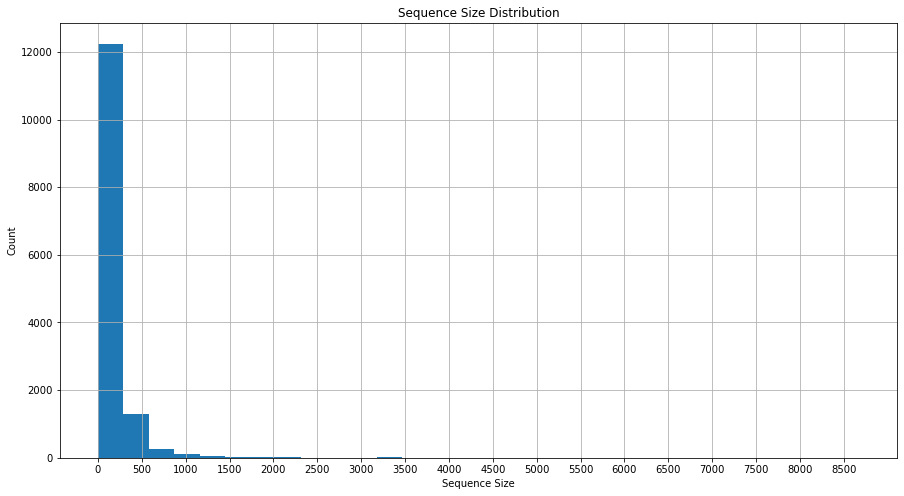

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(15,8))

plt.hist(seq_sizes, bins=30)

plt.xticks(np.arange(0,8700,500))

plt.xlabel('Sequence Size')
plt.ylabel('Count')
plt.title('Sequence Size Distribution')

plt.grid()
plt.show()

In [12]:
size_analysis = pd.DataFrame({'Percentiles': [25,50,75,80, 85,90,95,96,97,98,99], 
                              'Percentile Values': np.percentile(seq_sizes, [25,50,75,80, 85,90,95,96,97,98,99])})
size_analysis

,Percentiles,Percentile Values
0,25,65.0
1,50,112.0
2,75,195.0
3,80,226.0
4,85,271.0
5,90,344.0
6,95,515.0
7,96,583.2
8,97,693.0
9,98,901.6


Observations:
1. Clearly, 95% of sequences in train are of size <=515 which is ~13415

Conclusion: We use 95th percentile value as our maxlen

In [15]:
#we keep truncate to its default value 'pre' because we have added mails and subjects at the end of text and cannot afford to lose that information
X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen = 515) 
X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen = 515)

In [16]:
#check results
print(X_train_padded[:2])
print(X_test_padded[:2])

[[   0    0    0 ... 1035  534   11]
 [   0    0    0 ... 2281 2473   11]]
[[    0     0     0 ...  4333 62603  6078]
 [    0     0     0 ... 42180 23918 13147]]


In [17]:
#check shape 
print(X_train_padded.shape, X_test_padded.shape)

(14121, 515) (4707, 515)


In [97]:
np.save('saved/X_train_padded.npy',X_train_padded)
np.save('saved/X_test_padded.npy', X_test_padded)

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

1. In an embedding, words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space.
 
2. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used.

# Create Word Embedding Matrix using Glove 

In [9]:
import pickle
with open('glove_vectors', 'rb') as f:
    word_dict = pickle.load(f)
    glove_words = set(word_dict.keys())

1. Create a zeros matrix of shape (len(word_index.keys())+1, 300), we add 1 because word_index dictionary starts indexing from 1 like {word1: 1, word2: 2,..wordn: n} and we need each row index of matrix to match the word's index. So, the 0th row vector remains 0, the 1st row vector represents the word1, the 2nd row vector represents the word2 and so on.


2. Get the word vector corresponding to the word from glove's word_dict, if the word_dict doesn't have the word in its keys it will return None in that case the row vector at that index in matrix retains 0 values otherwise it will replace the row vector at that index with the vector obtained from word_dict.

In [10]:
embedded_layer_weights = np.zeros((len(word_index.keys())+1, 300))

for word, index in list(word_index.items()): 
    word_vec = word_dict.get(word)  
    if word_vec is not None:
        embedded_layer_weights[index] = word_vec

In [20]:
#check results
print(embedded_layer_weights.shape)
print(embedded_layer_weights[:5]) #0th row remains 0 and 1st row represents OOV token so its also 0 

(77316, 300)
[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [-0.20838   -0.14932   -0.017528  ... -0.54066    0.21199   -0.0094357]
 [-0.09611   -0.25788   -0.3586    ... -0.3703    -0.092774   0.39058  ]
 [ 0.15805   -0.26233    0.17418   ... -0.31724    0.23749    0.31161  ]]


This Word Embedding Matrix is fed as weights to the Embedding Layer of the Model.

# Model Building

highly recommend watching this for CNN layers understanding- https://www.youtube.com/watch?v=m8pOnJxOcqY

In [11]:
from tensorflow.keras import Model
from tensorflow.keras.layers import *
from tensorflow.random import set_seed
from tensorflow.keras.utils import plot_model
from numpy.random import seed

In [22]:
X_train_padded.shape, embedded_layer_weights.shape#weight mat

((14121, 515), (77316, 300))

### Writing Callbacks

In [25]:
from tensorflow_addons.metrics import F1Score
import datetime
import os

In [27]:
checkpoint_cb_dict = {}

for i in range (1,3):
    path = f'checkpoints_model_{i}' + '/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5'
    checkpoint_cb_dict[i] = keras.callbacks.ModelCheckpoint(filepath = path, monitor = 'val_accuracy', 
                                                save_best_only=True, verbose=0, mode='max')

In [28]:
checkpoint_cb_dict

{1: <keras.callbacks.ModelCheckpoint at 0x7f4c20178bd0>,
 2: <keras.callbacks.ModelCheckpoint at 0x7f4c20178f10>}

In [29]:
# refer for F1 score- https://stackoverflow.com/questions/66554207/calculating-micro-f-1-score-in-keras
earlystop_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, 
                                                   patience=3, verbose=1, mode='max', restore_best_weights=True)

In [30]:
%load_ext tensorboard 

In [33]:
tensorboard_cb_dict = {}

for i in range(1,3):
    log_dir = os.path.join(f'logs_model_{i}','fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_cb_dict[i] = keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

In [34]:
tensorboard_cb_dict

{1: <keras.callbacks.TensorBoard at 0x7f4c2ec23bd0>,
 2: <keras.callbacks.TensorBoard at 0x7f4c201853d0>}

In [58]:
callbacks_1 = [checkpoint_cb_dict[1], earlystop_callback, tensorboard_cb_dict[1]]

### Creating Functional Model

In [13]:
set_seed(42)
np.random.seed(42)


#Input shape = size of each sequence in our data (i.e. 562) #change this as per the analysis
input_layer = Input(shape=(515,))


#refer for embedding layer - https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce#:~:text=Embedding%20layer%20enables%20us%20to,way%20along%20with%20reduced%20dimensions.

#Embedding layer outputs a matrix of shape 515x300, it replaces each word index in the sequence by corresponding weight vector of size 300
embedding_layer =  Embedding(77316, 300, weights = [embedded_layer_weights], input_length=515, trainable=True)(input_layer)

#Convolute output from previous layer with different kernel sizes and concatenate the results
conv1D_m = Conv1D(filters = 16,kernel_size = 3, strides = 2, padding='same', activation='relu' )(embedding_layer) 
conv1D_n = Conv1D(filters = 16,kernel_size = 5, strides = 2, padding='same', activation='relu')(embedding_layer) 
conv1D_o = Conv1D(filters = 16,kernel_size = 7, strides = 2, padding='same',activation='relu')(embedding_layer) 
concat_1 = Concatenate()([conv1D_m,conv1D_n,conv1D_o])

#Apply Max Pooling on the output from previous layer
maxpool_1 = MaxPooling1D(pool_size=2, strides=2, padding='valid')(concat_1)

#Convolute output from previous layer with different kernel sizes and concatenate the results
conv1D_m2 = Conv1D(filters = 16,kernel_size = 4, strides = 2, padding='same', activation='relu')(maxpool_1)
conv1D_n2 = Conv1D(filters = 16,kernel_size = 6, strides = 2, padding='same', activation='relu')(maxpool_1) 
conv1D_o2 = Conv1D(filters = 16,kernel_size = 8, strides = 2, padding='same',activation='relu')(maxpool_1) 
concat_2 = Concatenate()([conv1D_m2,conv1D_n2,conv1D_o2])

#Apply Max Pooling on the output from previous layer
maxpool_2 = MaxPooling1D(pool_size=2, strides=2, padding='valid')(concat_2)

#Convolute output from previous layer 
conv1D_p = Conv1D(filters = 16,kernel_size = 12, strides = 2, padding='same',activation='relu')(maxpool_2)

#Flatten the output from previous layer
flatten = Flatten()(conv1D_p)

#Add dropout layer for regularization
dropout = Dropout(0.2)(flatten)

#Add Dense Layer 
dense_2 = Dense(64, activation='relu', kernel_initializer= keras.initializers.HeUniform())(dropout)

#Output layer returns 20 probability values each corresponding to a class  
output_layer = Dense(20, activation='softmax')(dense_2)


model = Model(inputs= [input_layer], outputs=[output_layer])

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 515)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 515, 300)     23194800    ['input_2[0][0]']                
                                                                                                  
 conv1d_7 (Conv1D)              (None, 258, 16)      14416       ['embedding_1[0][0]']            
                                                                                                  
 conv1d_8 (Conv1D)              (None, 258, 16)      24016       ['embedding_1[0][0]']            
                                                                                            

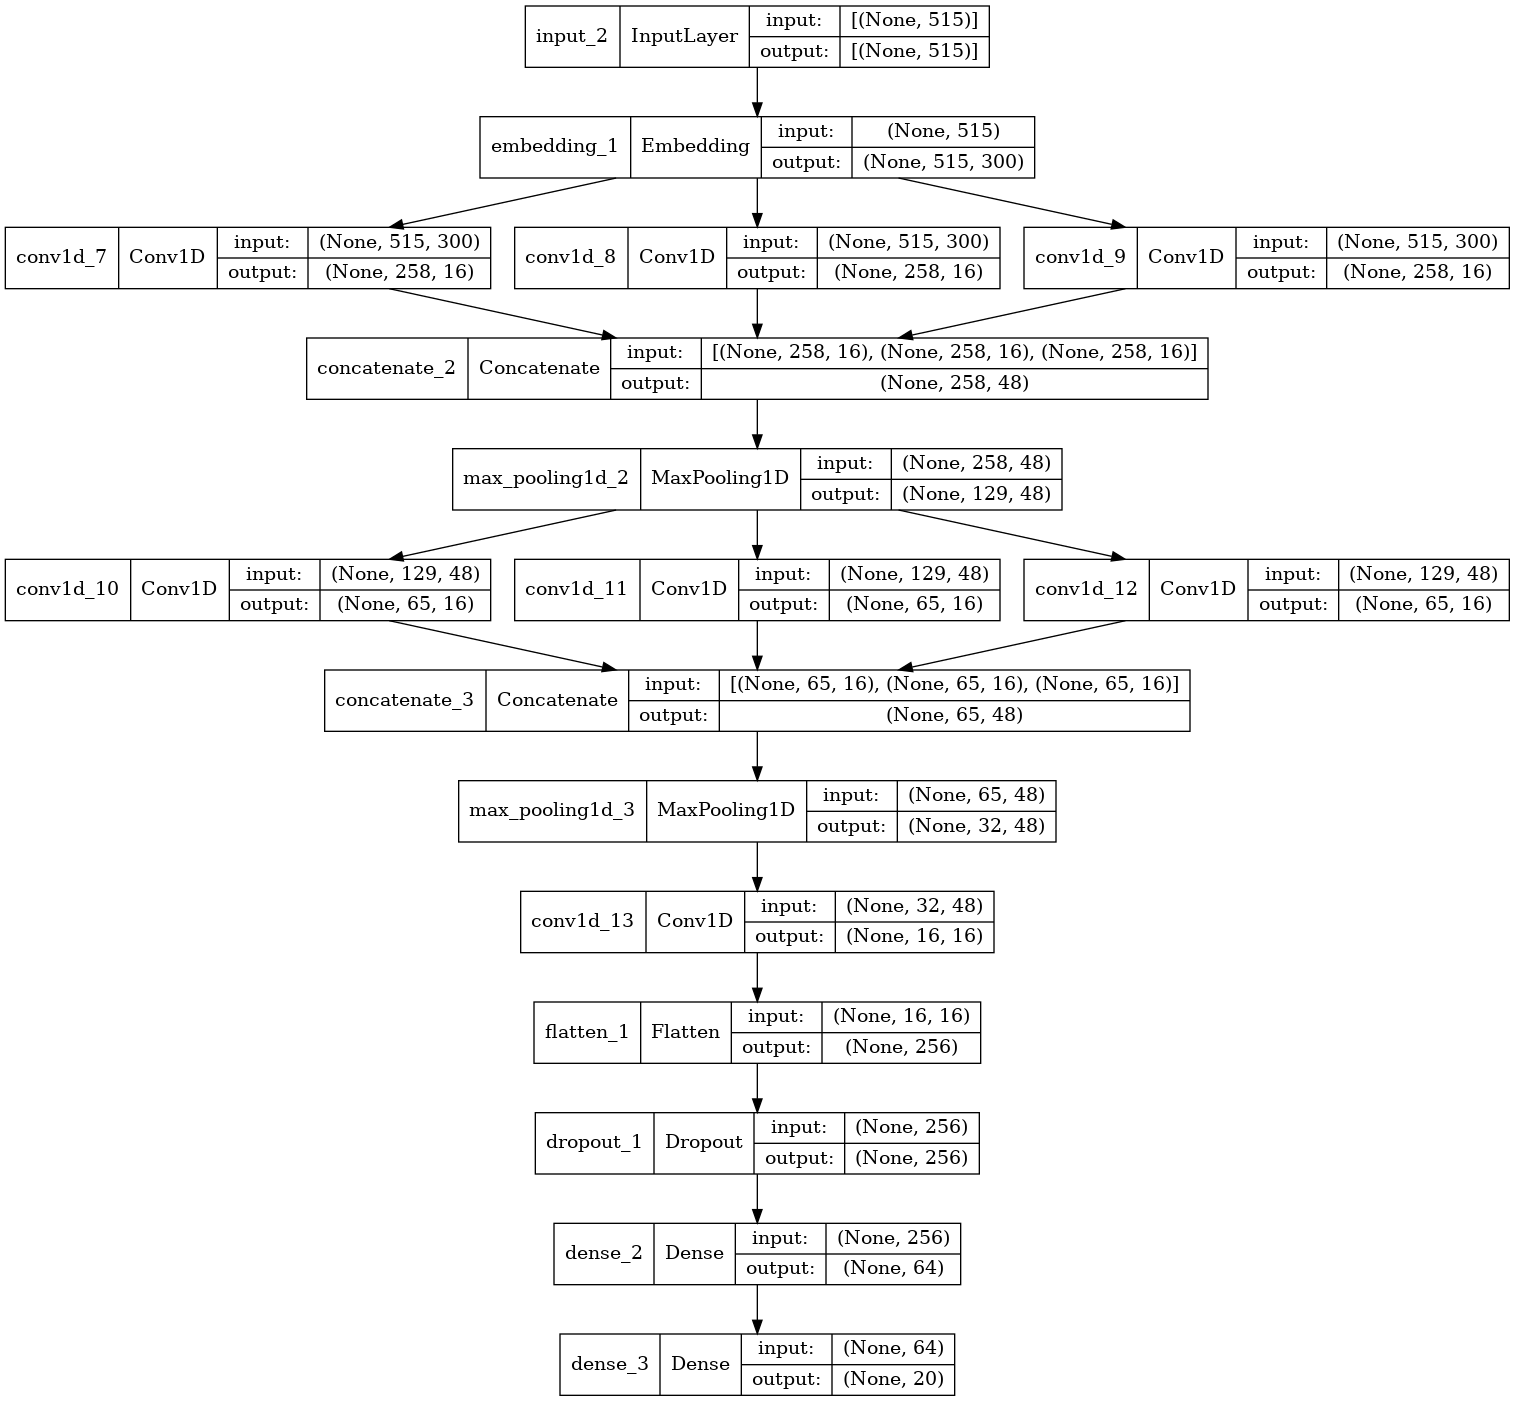

In [15]:
dot_img_file = 'images/model_1.png'
plot_model(model, to_file=dot_img_file, rankdir = 'TB', show_shapes=True)

### Training the Model

In [92]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy', F1Score(num_classes = 20, average = 'micro')])

#Using 20% of train as validation data
history = model.fit(X_train_padded, y_train, epochs=100, validation_split = 0.2, batch_size=100, class_weight =class_w_dict, callbacks = callbacks_1) 

Epoch 1/100
113/113 [==============================] - 28s 235ms/step - loss: 2.7500 - accuracy: 0.1048 - f1_score: 0.1048 - val_loss: 2.3042 - val_accuracy: 0.1890 - val_f1_score: 0.1890
Epoch 2/100
113/113 [==============================] - 26s 233ms/step - loss: 1.8676 - accuracy: 0.3412 - f1_score: 0.3412 - val_loss: 1.5507 - val_accuracy: 0.4623 - val_f1_score: 0.4623
Epoch 3/100
113/113 [==============================] - 27s 235ms/step - loss: 1.1928 - accuracy: 0.5799 - f1_score: 0.5799 - val_loss: 1.2140 - val_accuracy: 0.6053 - val_f1_score: 0.6053
Epoch 4/100
113/113 [==============================] - 27s 239ms/step - loss: 0.6478 - accuracy: 0.7779 - f1_score: 0.7779 - val_loss: 0.9832 - val_accuracy: 0.7034 - val_f1_score: 0.7034
Epoch 5/100
113/113 [==============================] - 27s 239ms/step - loss: 0.3125 - accuracy: 0.9029 - f1_score: 0.9029 - val_loss: 1.0363 - val_accuracy: 0.7136 - val_f1_score: 0.7136
Epoch 6/100
113/113 [==============================] - 27s 2

In [93]:
results = pd.DataFrame(history.history)
results

,loss,accuracy,f1_score,val_loss,val_accuracy,val_f1_score
0,2.750041,0.104816,0.104816,2.304174,0.189027,0.189027
1,1.867638,0.341183,0.341183,1.550711,0.462301,0.462301
2,1.192821,0.579851,0.579851,1.214043,0.605310,0.605310
3,0.647843,0.777886,0.777886,0.983229,0.703363,0.703363
4,0.312475,0.902886,0.902886,1.036254,0.713628,0.713628
5,0.163154,0.950602,0.950602,1.108560,0.746549,0.746549
6,0.091657,0.973973,0.973973,1.194261,0.751150,0.751150
7,0.059970,0.983977,0.983977,1.255101,0.759292,0.759292
8,0.058417,0.982118,0.982118,1.176503,0.770265,0.770265
9,0.042348,0.988580,0.988580,1.306081,0.769558,0.769558


Note:
- Blue represents Validation Set
- Orange represents Train Set

and

refer to understand why Micro F1 and Accuracy are same for multi class problems: https://stackoverflow.com/questions/37358496/is-f1-micro-the-same-as-accuracy#:~:text=Micoaverage%20precision%2C%20recall%2C%20f1%20and,TP%2F(TP%2BFN).


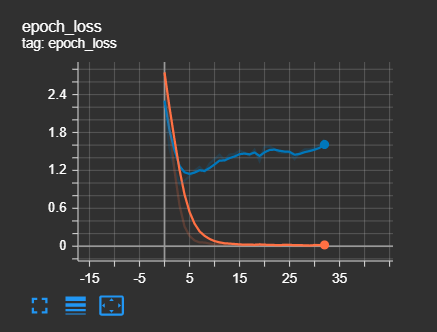

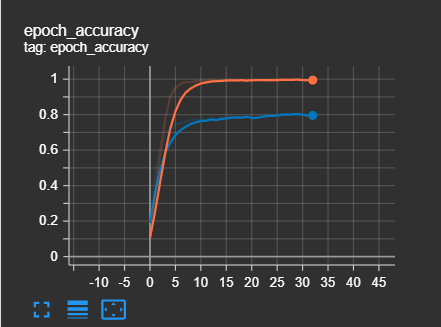

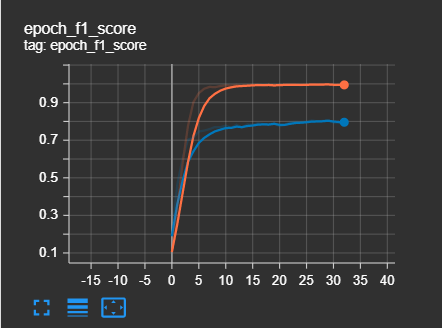

Observations:
1. Highest Validation Accuracy and Micro F1 are achieved at 30th epoch yielding a value of 0.8074 implying that 80.74% of the points being correctly classified.
2. Validation Loss is lowest at 4th epoch with a value of 0.98

### Checking Performance on Test Data

In [94]:
#load model with best weights
best_model = keras.models.load_model('checkpoints_model_1' + '/weights-30-0.8074.hdf5')

In [96]:
#checking Loss, Accuracy and Micro F1Score on Test
results = best_model.evaluate(X_test_padded,y_test)
print('Loss:',results[0], '\nAccuracy:',results[1], '\nMicro F1:',results[2])

148/148 [==============================] - 2s 11ms/step - loss: 1.4710 - accuracy: 0.8135 - f1_score: 0.8135
Loss: 1.4710383415222168 
Accuracy: 0.8134692907333374 
Micro F1: 0.8134693503379822


# Approach - 2

# Converting text to sequences (char level) using Keras Tokenizer

In [16]:
# refer for char embedding - https://towardsdatascience.com/character-level-cnn-with-keras-50391c3adf33
tok = keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n', char_level=True)
tok.fit_on_texts(X_train)

In [17]:
#tok word_index isn't in the order we require so we change it's order to alphabetical
tok.word_index

{' ': 1,
 'e': 2,
 't': 3,
 'a': 4,
 'o': 5,
 'n': 6,
 'i': 7,
 's': 8,
 'r': 9,
 'h': 10,
 'l': 11,
 'd': 12,
 'c': 13,
 'u': 14,
 'm': 15,
 'p': 16,
 'g': 17,
 'y': 18,
 'w': 19,
 'f': 20,
 'b': 21,
 'v': 22,
 'k': 23,
 'x': 24,
 'j': 25,
 'q': 26,
 'z': 27,
 '_': 28}

In [18]:
atoz_ = 'abcdefghijklmnopqrstuvwxyz_'
char_index = {}
for i,j in enumerate(atoz_):
    char_index[j] = i

tok.word_index = char_index.copy()

In [19]:
tok.word_index

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '_': 26}

In [103]:
X_train_char_seq = tok.texts_to_sequences(X_train)
X_test_char_seq = tok.texts_to_sequences(X_test)

In [105]:
#check results 
#note the length comes different because we haven't included 'space' char in our word_index
print(X_train[0][:10], len(X_train[0]))
print(X_train_char_seq[0][:10], len(X_train_char_seq[0]))

article ar 972
[0, 17, 19, 8, 2, 11, 4, 0, 17, 19] 823


In [106]:
print(X_test[0][:10], len(X_test[0]))
print(X_test_char_seq[0][:10], len(X_test_char_seq[0]))

article st 717
[0, 17, 19, 8, 2, 11, 4, 18, 19, 20] 595


# Analysis of Char Sequence length to determine best value for 'maxlen' parameter

In [107]:
char_seq_sizes = pd.Series(list(map(lambda x: len(x), X_train_char_seq)))
char_seq_sizes.describe()

count    14121.000000
mean       968.617662
std       1895.820712
min          7.000000
25%        326.000000
50%        567.000000
75%        996.000000
max      40521.000000
dtype: float64

Observations:
1. 75% of character sequence sizes are less than 996 which clearly means max(seq_size) which is 40521 is an outlier, we explore percentiles a little further.

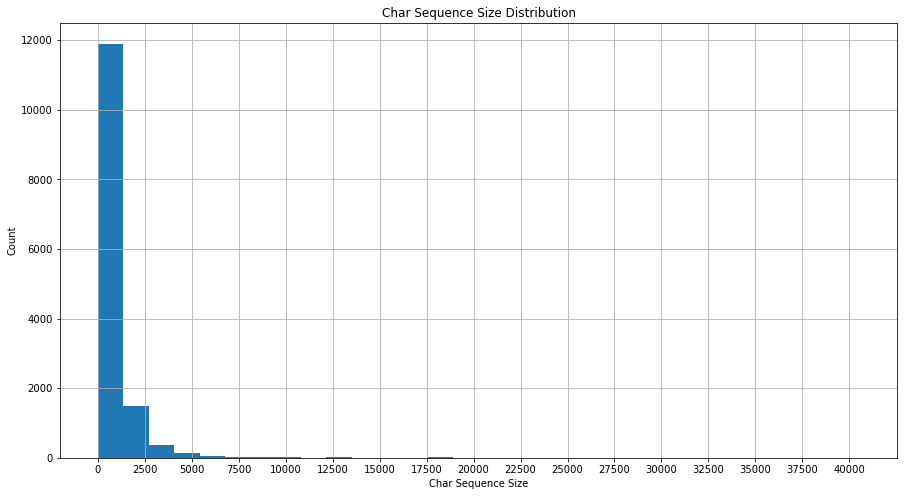

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(15,8))

plt.hist(char_seq_sizes, bins=30)

plt.xticks(np.arange(0,40600,2500)) #use the max value

plt.xlabel('Char Sequence Size')
plt.ylabel('Count')
plt.title('Char Sequence Size Distribution')

plt.grid()
plt.show()

In [109]:
char_seq_size_analysis = pd.DataFrame({'Percentiles': [25,50,75,80, 85,90,95,96,97,98,99], 
                              'Percentile Values': np.percentile(char_seq_sizes, [25,50,75,80, 85,90,95,96,97,98,99])})
char_seq_size_analysis

,Percentiles,Percentile Values
0,25,326.0
1,50,567.0
2,75,996.0
3,80,1161.0
4,85,1395.0
5,90,1777.0
6,95,2738.0
7,96,3110.4
8,97,3618.4
9,98,4706.2


Observations:
1. Clearly, 95%(~13415) of sequences in train are of size <=2738

Conclusion: We use 95th percentile value as our maxlen

In [117]:
X_train_char_seq_padded = keras.preprocessing.sequence.pad_sequences(X_train_char_seq, maxlen=2738)
X_test_char_seq_padded = keras.preprocessing.sequence.pad_sequences(X_test_char_seq, maxlen=2738)

In [118]:
print(X_train_char_seq_padded.shape, X_test_char_seq_padded.shape)

(14121, 2738) (4707, 2738)


In [119]:
np.save('saved/X_train_char_seq_padded.npy',X_train_char_seq_padded)
np.save('saved/X_test_char_seq_padded.npy', X_test_char_seq_padded)

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

# Create Char Embedding Matrix using Glove 

In [20]:
char_dict = {}
char_file = open("glove_char.txt")
for line in char_file:
    line = line.split()
    
    #the 0th element in each line is the character, rest is the char_vector
    key = line[0]
    value = np.array([float(x) for x in line[1:]])
    
    #add key value pairs
    char_dict[key] = value

In [21]:
char_emb_weights = np.zeros((len(char_index.keys()), 300))
for i, j in enumerate(list(char_index.keys())):
    char_vec = char_dict.get(j)
    char_emb_weights[i] = char_vec

In [129]:
print(char_emb_weights.shape)
print(char_emb_weights[:5])

(27, 300)
[[ 0.239511 -0.295339  0.120109 ...  0.182586 -0.071808 -0.127836]
 [ 0.235942 -0.28797   0.117332 ...  0.164853 -0.088554 -0.120673]
 [ 0.238415 -0.301016  0.128149 ...  0.165534 -0.066753 -0.115556]
 [ 0.240929 -0.300166  0.124712 ...  0.163956 -0.070336 -0.130445]
 [ 0.238061 -0.291508  0.115194 ...  0.159954 -0.073778 -0.124827]]


# Model Building

In [138]:
callbacks_2 = [checkpoint_cb_dict[2], earlystop_callback, tensorboard_cb_dict[2]]

### Creating Sequential Model

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
set_seed(42)
seed(42)

model_2 = Sequential([
    Embedding(27, 300, weights = [char_emb_weights], input_length = 2738, trainable=True),
    
    Conv1D(filters = 16,kernel_size = 3, strides = 2, padding='same', activation='relu'),
    Conv1D(filters = 16,kernel_size = 5, strides = 2, padding='same', activation='relu'),
    
    MaxPooling1D(pool_size=2, strides=2, padding='valid'),
    
    Conv1D(filters = 16,kernel_size = 2, strides = 2, padding='same', activation='relu'),
    Conv1D(filters = 16,kernel_size = 4, strides = 2, padding='same', activation='relu'),
    
    MaxPooling1D(pool_size=3, strides=3, padding='valid'),
    
    Flatten(),
    
    Dropout(0.2),
    
    Dense(64, activation='relu',kernel_initializer= keras.initializers.HeUniform()),
    
    Dense(20, activation='softmax', name='output_layer')
])
    
print(model_2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2738, 300)         8100      
                                                                 
 conv1d_14 (Conv1D)          (None, 1369, 16)          14416     
                                                                 
 conv1d_15 (Conv1D)          (None, 685, 16)           1296      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 342, 16)          0         
 1D)                                                             
                                                                 
 conv1d_16 (Conv1D)          (None, 171, 16)           528       
                                                                 
 conv1d_17 (Conv1D)          (None, 86, 16)            1040      
                                                        

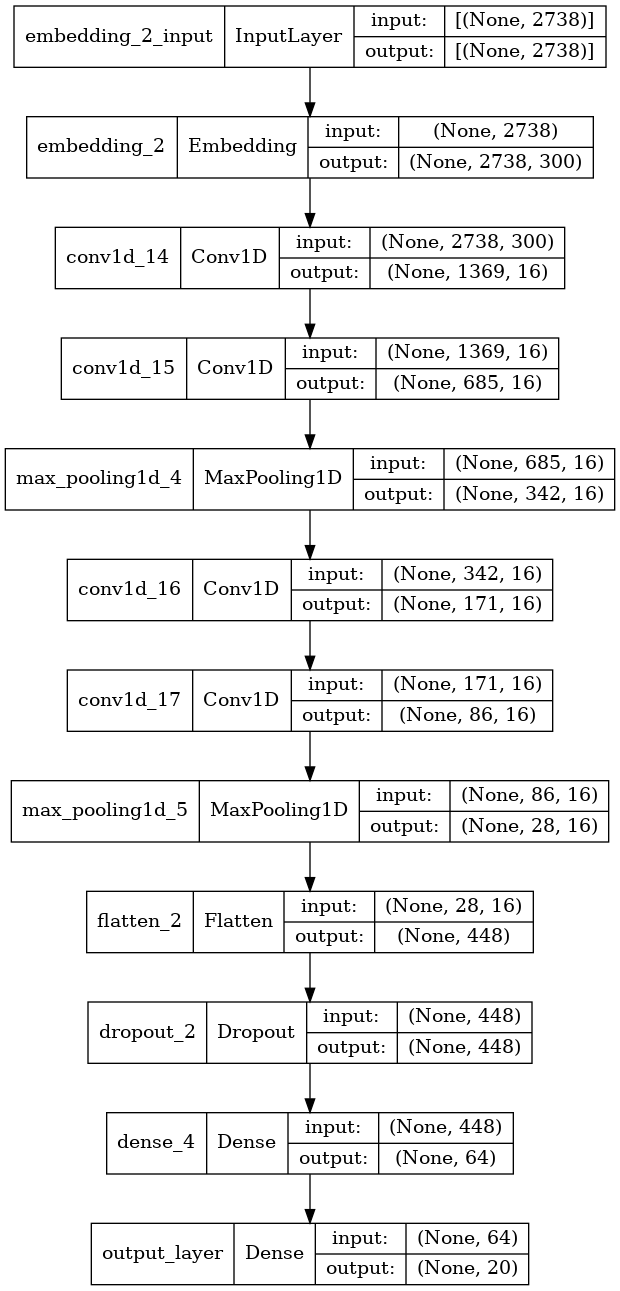

In [24]:
dot_img_file_2 = 'images/model_2.png'
plot_model(model_2, to_file=dot_img_file_2, rankdir = 'TB', show_shapes=True)

### Training the Model

In [143]:
model_2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy', F1Score(average='micro', num_classes=20)])

#Using 20% of train as validation data
history_2 = model_2.fit(X_train_char_seq_padded, y_train, epochs=100, validation_split = 0.2, batch_size=100, class_weight =class_w_dict, callbacks = callbacks_2) 

Epoch 1/100
113/113 [==============================] - 35s 301ms/step - loss: 2.9949 - accuracy: 0.0429 - f1_score: 0.0429 - val_loss: 2.9740 - val_accuracy: 0.0471 - val_f1_score: 0.0471
Epoch 2/100
113/113 [==============================] - 34s 300ms/step - loss: 2.9506 - accuracy: 0.0717 - f1_score: 0.0717 - val_loss: 2.9396 - val_accuracy: 0.0864 - val_f1_score: 0.0864
Epoch 3/100
113/113 [==============================] - 34s 297ms/step - loss: 2.9265 - accuracy: 0.0853 - f1_score: 0.0853 - val_loss: 2.9261 - val_accuracy: 0.0896 - val_f1_score: 0.0896
Epoch 4/100
113/113 [==============================] - 34s 304ms/step - loss: 2.9080 - accuracy: 0.0914 - f1_score: 0.0914 - val_loss: 2.9058 - val_accuracy: 0.0857 - val_f1_score: 0.0857
Epoch 5/100
113/113 [==============================] - 34s 302ms/step - loss: 2.8716 - accuracy: 0.0999 - f1_score: 0.0999 - val_loss: 2.8812 - val_accuracy: 0.1005 - val_f1_score: 0.1005
Epoch 6/100
113/113 [==============================] - 34s 2

In [144]:
results_2 = pd.DataFrame(history_2.history)
results_2

,loss,accuracy,f1_score,val_loss,val_accuracy,val_f1_score
0,2.994918,0.042936,0.042936,2.973992,0.047080,0.047080
1,2.950555,0.071707,0.071707,2.939634,0.086372,0.086372
2,2.926453,0.085340,0.085340,2.926099,0.089558,0.089558
3,2.908008,0.091448,0.091448,2.905809,0.085664,0.085664
4,2.871630,0.099858,0.099858,2.881190,0.100531,0.100531
5,2.819984,0.115970,0.115970,2.835571,0.095575,0.095575
6,2.773069,0.131020,0.131020,2.834736,0.103009,0.103009
7,2.742074,0.137482,0.137482,2.857056,0.104071,0.104071
8,2.709948,0.143856,0.143856,2.827787,0.102301,0.102301
9,2.685096,0.154834,0.154834,2.800215,0.112566,0.112566


Note:
- Blue represents Validation Set
- Orange represents Train Set

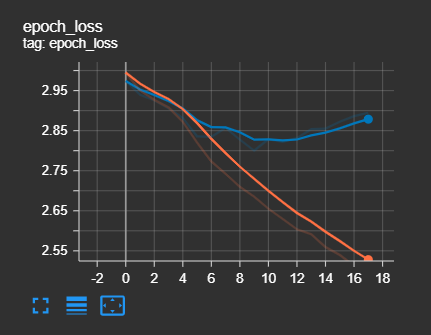

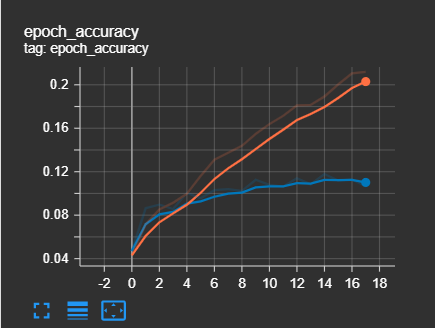

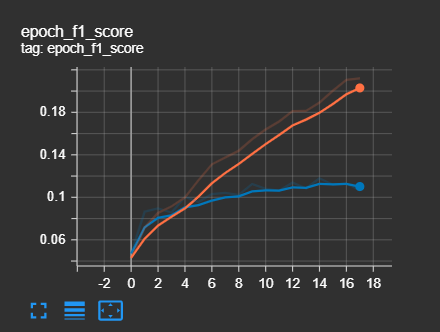

Observations: 
1. Highest Accuracy and Micro F1 are achieved at 15th epoch yielding a value of 0.1179 implying that only 11.79% of the points being correctly classified.
2. Loss is lowest at 10th epoch with a value of 2.80

### Checking Performance on Test Data

In [145]:
#load model with best weights
best_model_2 = keras.models.load_model('checkpoints_model_2' + '/weights-15-0.1179.hdf5')

In [147]:
#checking Loss, Accuracy and Micro F1Score on Test
results_2 = best_model_2.evaluate(X_test_char_seq_padded,y_test)
print('Loss:',results_2[0], '\nAccuracy:',results_2[1], '\nMicro F1:',results_2[2])

148/148 [==============================] - 3s 18ms/step - loss: 2.8421 - accuracy: 0.1134 - f1_score: 0.1134
Loss: 2.8420562744140625 
Accuracy: 0.11344805359840393 
Micro F1: 0.11344805359840393


# Summary

In [149]:
#Tabulate your results
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Embedding","Model", "Accuracy", "Micro F1"]
x.add_rows(
    [
        ["Word","CNN", 0.81, 0.81],
        ["Char","CNN", 0.11, 0.11]
     
    ]
)

print(x)

+-----------+-------+----------+----------+
| Embedding | Model | Accuracy | Micro F1 |
+-----------+-------+----------+----------+
|    Word   |  CNN  |   0.81   |   0.81   |
|    Char   |  CNN  |   0.11   |   0.11   |
+-----------+-------+----------+----------+


Conclusion : Clearly Word Embedded CNN outperforms Char Embedded CNN by a huge margin and therefore is a better approach for this problem.

In [ ]:
import shutil
import os
# #clear logs and checkpoints before every run
# shutil.rmtree('checkpoints_model_1')
# shutil.rmtree('logs_model_1')

# shutil.rmtree('checkpoints_model_2')
# shutil.rmtree('logs_model_2')